In [41]:
import maboss
from tqdm import tqdm
import os
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [42]:
ensemble = maboss.Ensemble(path = '/home/spankaew/Git/BooleanBenchmark/models/Invasion')

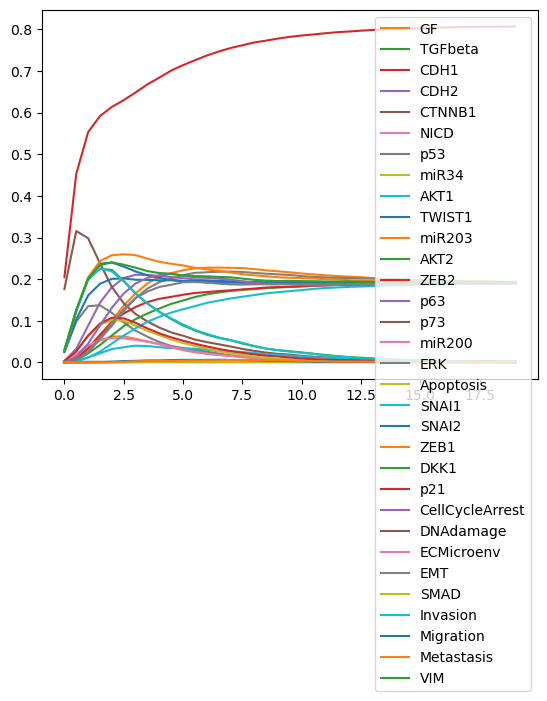

In [43]:
model = maboss.loadBNet('/home/spankaew/Git/BooleanBenchmark/models/Invasion/Invasion_0.bnet')
model.update_parameters(max_time = 20)
simulation = model.run()
simulation.plot_node_trajectory()

In [12]:
# Create blank file to get the results
ensemble_results = {}

path = '/home/spankaew/Git/BooleanBenchmark/models/Invasion/' 
model_list = os.listdir(path)

for model in tqdm(model_list):

    # Load model
    simulations = maboss.loadBNet(path + model)

    # Setup the model initial condition
    ## Put all inputs at random
    for i in simulations.network.names:
        simulations.network.set_istate(i,[0.5,0.5])
        
    # Modify the parameter of the model
    simulations.update_parameters(sample_count = 10000,
                                  thread_count = 15,
                                  max_time = 20,
                                  time_tick = 1)
    simulations.network.set_output(simulations.network.names)

    # Perform simulations
    result = simulations.run()

    # Get matrix
    model_mtx = result.get_nodes_probtraj().copy()

    # Setup cell matrix
    ## Cells
    model_mtx['model_id'] = model.replace('.bnet','')
    ## Timepoint
    model_mtx['timepoint'] = model_mtx.index
    ## Change index
    model_mtx.index = model_mtx.index.map(str)
    model_mtx.index = model + '_' + model_mtx.index

    # Concatenate model results in dictionary
    ensemble_results[model] = model_mtx

  0%|          | 0/1024 [00:00<?, ?it/s]

100%|██████████| 1024/1024 [50:14<00:00,  2.94s/it]


In [13]:
import pandas as pd
simulation_df = pd.concat(ensemble_results.values(), ignore_index = True)
simulation_df.to_csv('/home/spankaew/Git/BooleanBenchmark/tmp/Invasion_simulation_new.csv')

In [44]:
cl_df = pd.read_csv('/home/spankaew/Git/BooleanBenchmark/tmp/Invasion_simulation_new.csv', index_col = 0)
cl_df.index = cl_df.model_id + '_' + [str(f) for f in cl_df.timepoint]
cl_df.index.name = None

In [45]:
adata = sc.AnnData(cl_df.drop(['model_id','timepoint'],axis = 1))
adata.obs['timepoint'] = cl_df['timepoint']
adata.obs['model_id'] = cl_df['model_id']

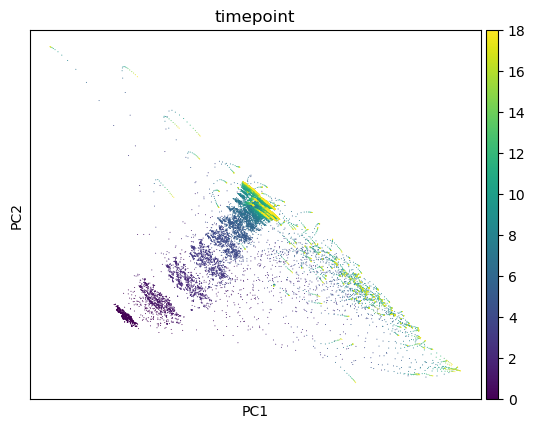

In [46]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color = 'timepoint', size = 2)

In [47]:
adata.obs

,timepoint,model_id
Invasion_532_0.0,0.0,Invasion_532
Invasion_532_1.0,1.0,Invasion_532
Invasion_532_2.0,2.0,Invasion_532
Invasion_532_3.0,3.0,Invasion_532
Invasion_532_4.0,4.0,Invasion_532
...,...,...
Invasion_799_14.0,14.0,Invasion_799
Invasion_799_15.0,15.0,Invasion_799
Invasion_799_16.0,16.0,Invasion_799
Invasion_799_17.0,17.0,Invasion_799


/home/spankaew/anaconda3/envs/scPROFILE/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/spankaew/anaconda3/envs/scPROFILE/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/spankaew/anaconda3/envs/scPROFILE/lib/python3.10/site-

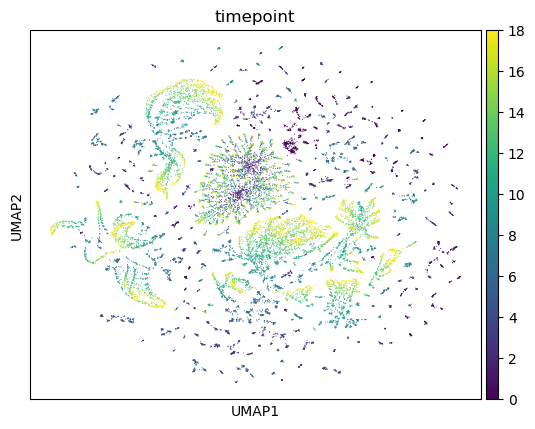

In [18]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(
    adata,
    color="timepoint",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

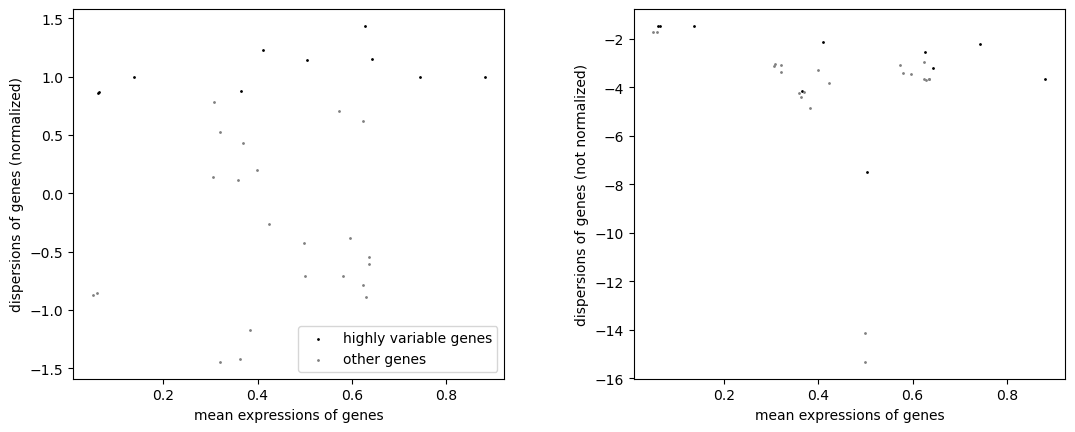

In [48]:
sc.pp.highly_variable_genes(adata, n_top_genes=10)
sc.pl.highly_variable_genes(adata)

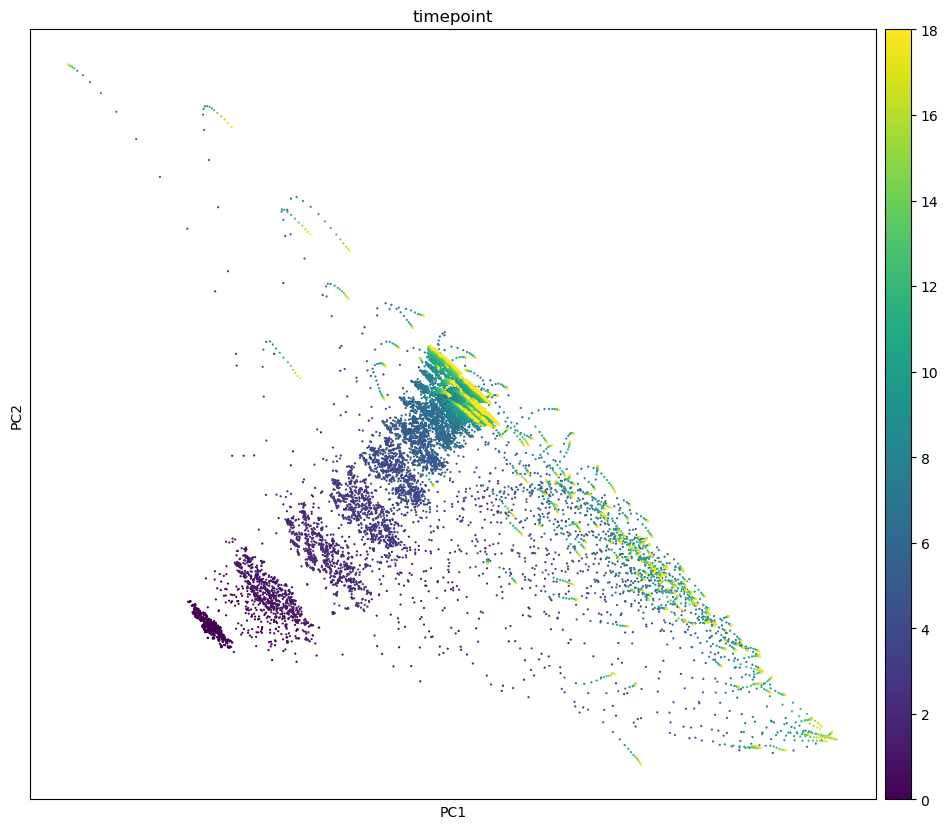

In [49]:
from matplotlib.pyplot import rc_context
with rc_context({"figure.figsize": (12, 10)}):
    sc.pl.pca(adata, color = 'timepoint', size = 10)

In [50]:
pca_mat = [array[:2] for array in adata.obsm['X_pca']]
pca_mat = pd.DataFrame(pca_mat, columns= ['pca1','pca2'])
pca_mat.index = adata.obs.index


In [51]:
pca_mat = pd.concat([pca_mat, adata.obs], axis = 1,ignore_index = False)

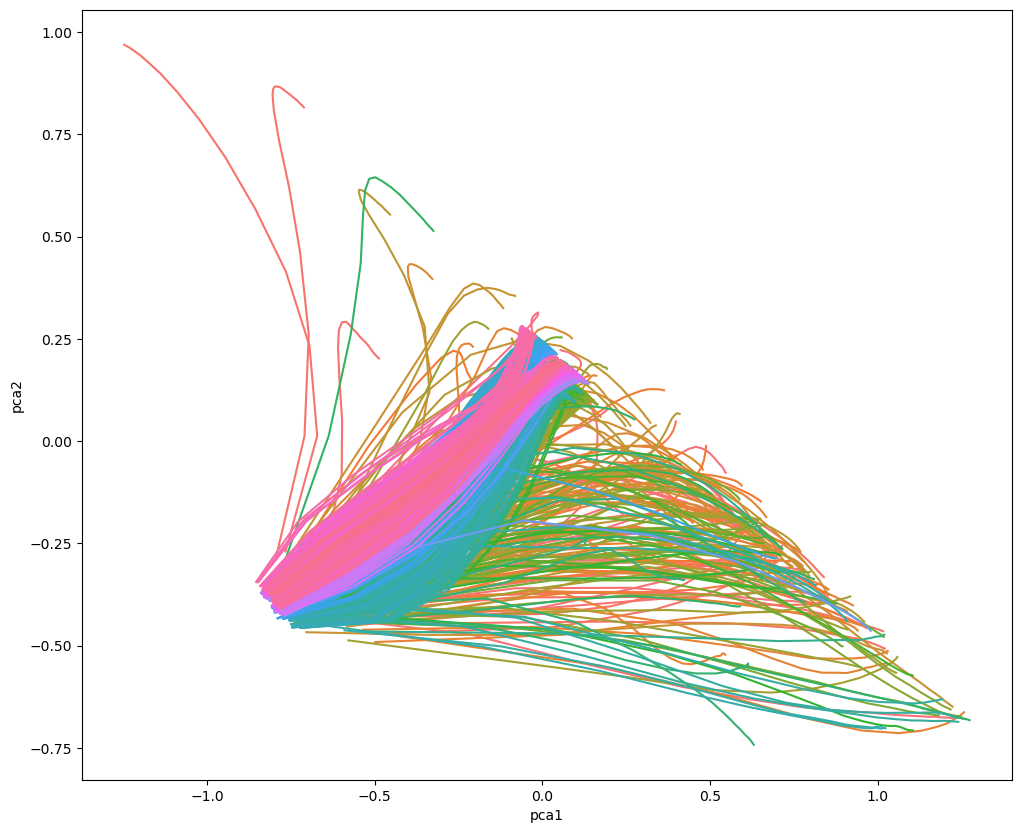

In [13]:
import seaborn as sns
with rc_context({"figure.figsize": (12, 10)}):
    plot = sns.lineplot(data = pca_mat, x = 'pca1',y='pca2',hue = 'model_id', sort = False)
    plot.get_legend().remove()

plt.show()

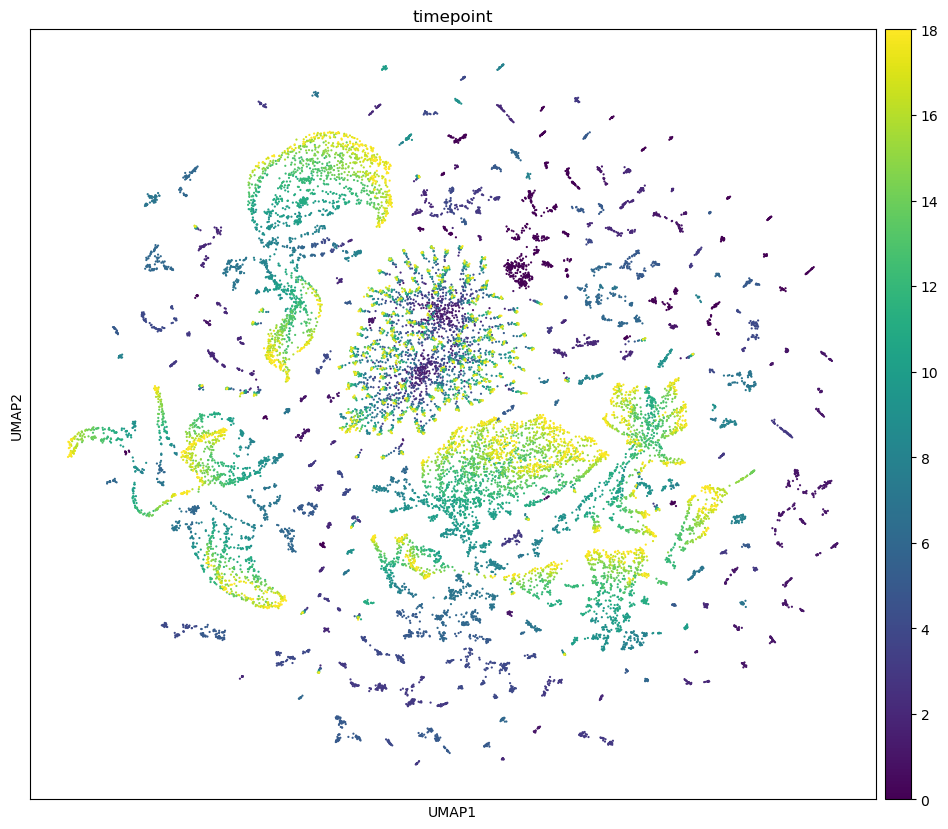

In [23]:
from matplotlib.pyplot import rc_context
with rc_context({"figure.figsize": (12, 10)}):
    sc.pl.umap(
    adata,
    color="timepoint",
    size=10
)

# Trajectory comparison using single variable from PCA

In [14]:
import tslearn
from tslearn.datasets import CachedDatasets
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.preprocessing import TimeSeriesResampler
import numpy


seed = 0
numpy.random.seed(seed)

Euclidean k-means
0.105 --> 0.091 --> 0.086 --> 0.085 --> 0.085 --> 0.085 --> 0.085 --> 0.085 --> 0.085 --> 0.084 --> 0.084 --> 0.084 --> 0.084 --> 0.084 --> 0.084 --> 0.084 --> 0.084 --> 0.084 --> 0.084 --> 0.084 --> 


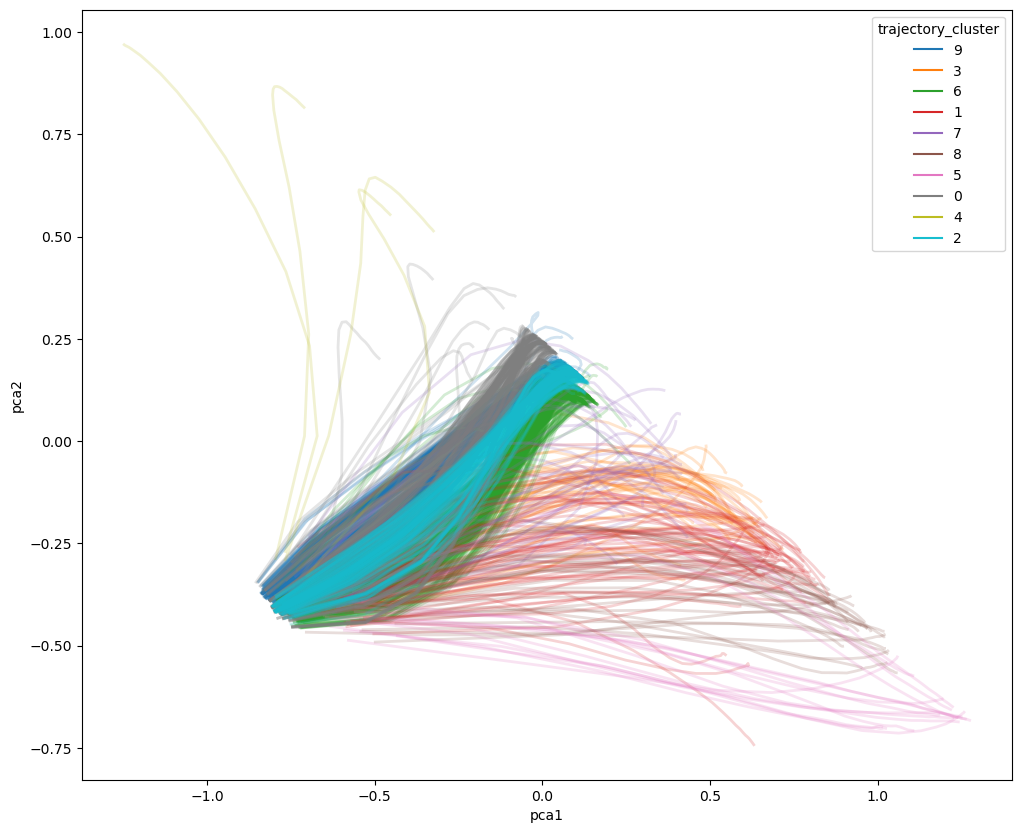

In [129]:
model_name = pca_mat.model_id.cat.categories

model_pca_all = {}
for i in model_name:
    model_pca = pca_mat.loc[pca_mat.model_id == i,['pca1','pca2']].values
    model_pca_all[i] = numpy.array(model_pca)

pca_all_trajectory = numpy.array(list(model_pca_all.values()))

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=10, verbose=True, random_state=seed)
y_pred = km.fit_predict(pca_all_trajectory)


# Plot the trajectory
cluster_dict = dict(zip(list(model_name),list(y_pred)))
pca_mat['trajectory_cluster'] = pca_mat['model_id']
pca_mat['trajectory_cluster'] = pca_mat['trajectory_cluster'].replace(cluster_dict)

import seaborn as sns
with rc_context({"figure.figsize": (12, 10)}):
    plot = sns.lineplot(data = pca_mat, 
                        x = 'pca1',y='pca2',
                        hue = 'trajectory_cluster', units = 'model_id', estimator = None, lw=2, alpha = .2,
                        sort = False)
    #plot.get_legend().remove()

plt.show()

In [132]:
pca_mat.trajectory_cluster.value_counts()/19

trajectory_cluster
6    269.0
9    215.0
0    201.0
2    164.0
1     55.0
3     42.0
7     30.0
8     28.0
5     16.0
4      4.0
Name: count, dtype: float64

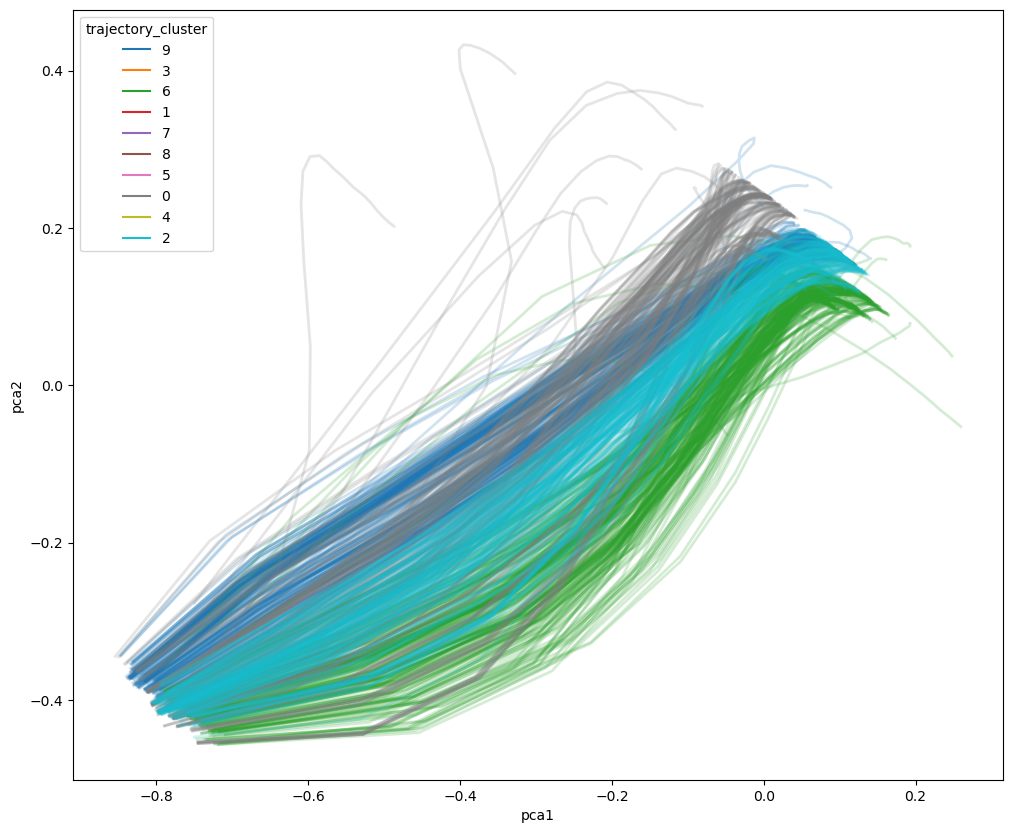

In [143]:
import seaborn as sns
selected_clusters = {6,9,0,2}
with rc_context({"figure.figsize": (12, 10)}):
    plot = sns.lineplot(data = pca_mat[pca_mat['trajectory_cluster'].isin(selected_clusters)], 
                        x = 'pca1',y='pca2',
                        hue = 'trajectory_cluster', units = 'model_id', estimator = None, lw=2, alpha = .2,
                        sort = False)
    #plot.get_legend().remove()

plt.show()

Euclidean k-means
0.041 --> 0.034 --> 0.035 --> 0.035 --> 0.036 --> 0.036 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 0.035 --> 


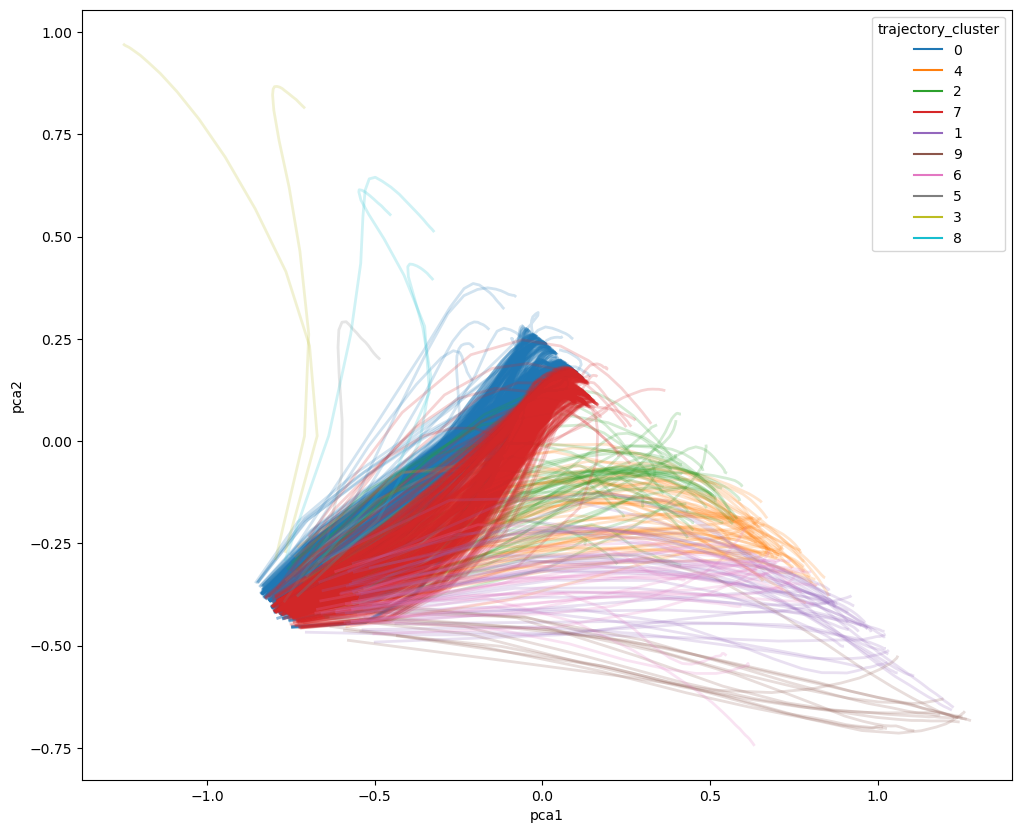

In [144]:
model_name = pca_mat.model_id.cat.categories

model_pca_all = {}
for i in model_name:
    model_pca = pca_mat.loc[pca_mat.model_id == i,['pca1','pca2']].values
    model_pca_all[i] = numpy.array(model_pca)

pca_all_trajectory = numpy.array(list(model_pca_all.values()))

# Euclidean k-means
print("Euclidean k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=10,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(pca_all_trajectory)


# Plot the trajectory
cluster_dict = dict(zip(list(model_name),list(y_pred)))
pca_mat['trajectory_cluster'] = pca_mat['model_id']
pca_mat['trajectory_cluster'] = pca_mat['trajectory_cluster'].replace(cluster_dict)

import seaborn as sns
with rc_context({"figure.figsize": (12, 10)}):
    plot = sns.lineplot(data = pca_mat, 
                        x = 'pca1',y='pca2',
                        hue = 'trajectory_cluster', units = 'model_id', estimator = None, lw=2, alpha = .2,
                        sort = False)
    #plot.get_legend().remove()

plt.show()

- Find mean PCA postion for each clusters 

- Find mean Euclidean distance at each timestpes between clusters 

In [152]:
pca_mat.groupby(['timepoint','trajectory_cluster'])['pca1'].mean()

timepoint  trajectory_cluster
0.0        0                    -0.797477
           4                    -0.628439
           2                    -0.631596
           7                    -0.761012
           1                    -0.560074
                                   ...   
18.0       9                     1.178368
           6                     0.682173
           5                    -0.486815
           3                    -0.978969
           8                    -0.368871
Name: pca1, Length: 190, dtype: float32

In [147]:
pca_mat.trajectory_cluster.value_counts()/19

trajectory_cluster
0    448.0
7    405.0
4     51.0
2     46.0
1     32.0
6     23.0
9     13.0
8      3.0
3      2.0
5      1.0
Name: count, dtype: float64

In [84]:
test = {}
test['0'] = [1,2,3]
test['1'] = [4,5,6]
test['3'] = [7,8,9]


Euclidean k-means
0.199 --> 0.184 --> 0.184 --> 0.184 --> 0.184 --> 


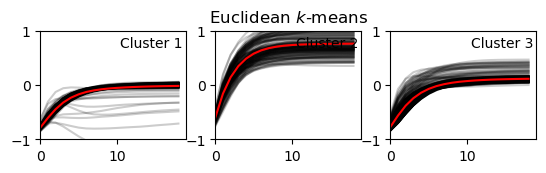

In [86]:
plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in pca1_trajectory[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 19)
    plt.ylim(-1, 1)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

(-1.0, 1.0)

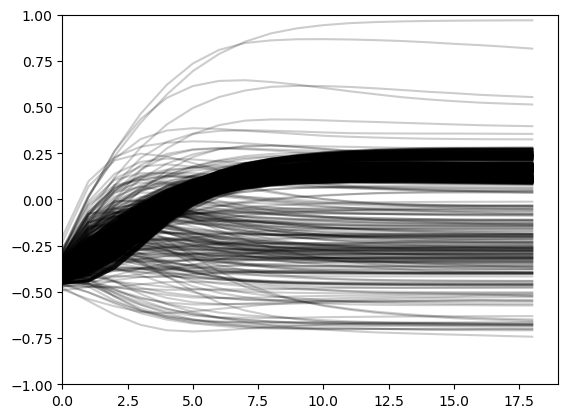

In [65]:
model_name = pca_mat.model_id.cat.categories

for i in model_name:
    model_pca = pca_mat.loc[pca_mat.model_id == i].pca2.values
    plt.plot(model_pca, "k-", alpha=.2)

plt.xlim(0, 19)
plt.ylim(-1, 1)